<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Decision tree classification</h2>
</div>

## Table of contents 
1. Convert Business Problem to Data Science Problem
2. Load Data
3. Understand the Data
4. Exploratory Data Analysis
5. Data Preprocessing 
6. Model Building 
7. Hyperparameter Tuning    

## Decision Tree classification

**Classification Tree:**
We use mode (most frequent category in that region will be the prediction) 
For discrete categorical target variables.
Eg. Predicting High or Low, Win or Loss, Healthy or Unhealthy etc.

**Splitting the nodes in Classification Tree:**

Now let’s see how the Classification Tree splits the attributes using the above stated measures.
 Regression RSS is used to decide the split.
In Classification we can use.
1. Classification error rate 
2. Gini Index 
3. Cross Entropy 
Gini index and cross entropy signifies node purity.

I’m using the below table data to calculate the entropy value.

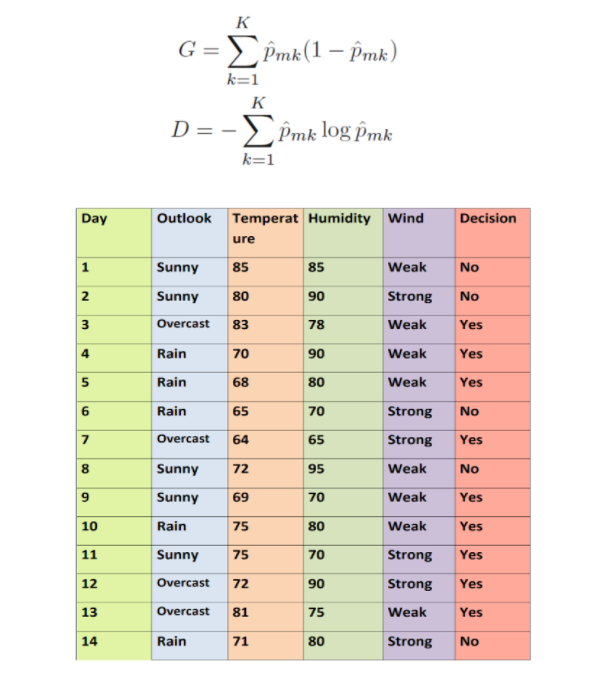

Here the decision column is the target column we are going to use for splitting the nodes for a Classification tree.

**Entropy:** Entropy is a measure of the randomness in the information being processed. The higher the entropy, the harder it is to draw any conclusions from that information. Flipping a coin is an example of an action that provides information that is random.

Entropy Formula:
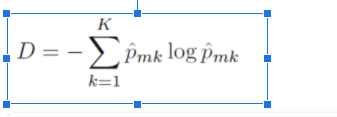

We have taken decision values as it is a 
categorical variable there are two types “YES” and “NO” totally 14 values, 9(YES) category values and 5(NO)category values we will divide with 14 and apply log function on it.

Entropy(Decision) = -[p(9/14).log2p(9/14)+p(5/14).log2p(5/14)] <br/>
                  =    -[(0.642)(-0.639)+(0.357)(-1.486)]  <br/>
                  =    -[-0.410+0.530]  <br/>
                  =    -[-0.94]  <br/>
                  =    0.940  <br/>


**Gini:** You can understand the Gini index as a cost function used to evaluate splits in the dataset. It is calculated by subtracting the sum of the squared probabilities of each class from one. It favors larger partitions and is easy to implement whereas information gain favors smaller partitions with distinct values.
Higher the value of Gini index higher the homogeneity.

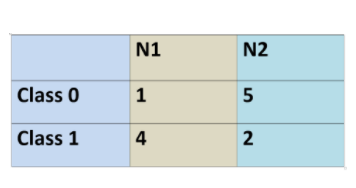

Gini Formula:

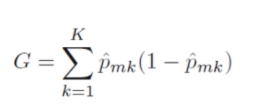
Gini(N1)   =   1-[(1/5)2+(4/5)2] <br/>
	       =   1-[(0.2)2+(0.8)2] <br/>
	       =   1-[0.04 + 0.64] <br/>
	       =   1-0.68 <br/>
	       =   0.32 <br/>

Gini(N2)   =   1-[(5/7)2+(427)2] <br/>
	       =   1-[(0.2)2+(0.8)2] <br/>
	       =   1-[0.04 + 0.64] <br/>
	       =   1-0.68 <br/>
	       =   0.32 <br/>
Gini(children)   =  (0.32)(5/12)+(0.41)(7/12) <br/>
		     =  (0.32)(0.416)+(0.41)(0.583) <br/>
     =   0.133+0.239 <br/>
     =   0.372 <br/>

Conclusion :  Classification 2 is our best split by having Gini value 0.372 because which is having the minimum error rate.

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Importing Libraries</h2>
</div>

In [39]:
# Basic libraries required
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>1. Convert Business Problem to Data Science Problem</h2>
</div>

A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction

Now, this dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 18 features.

Here we will be using Decision tree classifier to solve this problem

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>2. Load Data</h2>
</div>

In [40]:
# read the data using read_csv()
data = pd.read_csv("BankChurners.csv", header=0)

In [41]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>3. Understanding Data </h2>


In [42]:
# Shape of the data
data.shape

(10127, 21)

In [43]:
# Summary of the data
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>4. Exploratory Data Analysis </h2>
</div>

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [45]:
# The attrition_flag is the target column y.
data.Attrition_Flag.value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

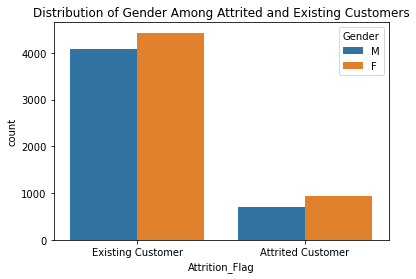

In [46]:
sns.countplot(x='Attrition_Flag', data=data, hue='Gender')
plt.title("Distribution of Gender Among Attrited and Existing Customers")
plt.show()

* The above countplot is plotted on two columns 
1. Attrition_Flag - The Attrition_flag column has 2 types of values in it (Attrited customer, Existing customer)
2. Gender- The Gender column has 2 types of values in it (Male, Female)

* In the above plotting you can observe Existing customers value in the bank is more when compared with Attrited customer
* In both Existing and Attrited customers the female customers are high when compared with male customers


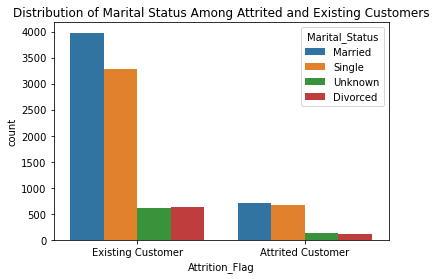

In [47]:
sns.countplot(x='Attrition_Flag', data=data, hue='Marital_Status')
plt.title("Distribution of Marital Status Among Attrited and Existing Customers")
plt.show()

* The above countplot is plotted on two columns 
1. Attrition_Flag - The Attrition_flag column has 2 types of values in it (Attrited customer, Existing customer)
2. Marital_status - The Marital_status column has 4 types of values in it (Married,single,Unknown,Divorced)

* The main Observation in the above plotting is Married customers have more existing accounts in the bank when compared with other categories
* Also the same in Attrited Customer

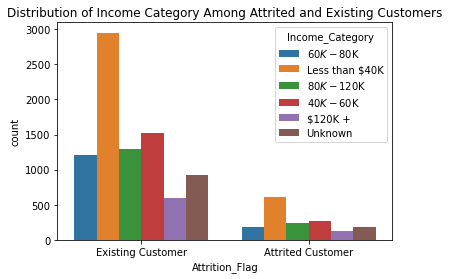

In [48]:
sns.countplot(x='Attrition_Flag', data=data, hue='Income_Category')
plt.title("Distribution of Income Category Among Attrited and Existing Customers")
plt.show()

* The above countplot is plotted on two columns 

1. Attriton_flag Column
2. Income_category
* From the above plotting the main observation is most of the existing customers in the bank have income range <40k when compared with other customers

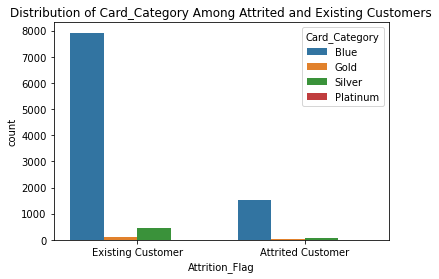

In [49]:
sns.countplot(x='Attrition_Flag', data=data, hue='Card_Category')
plt.title("Distribution of Card_Category Among Attrited and Existing Customers")
plt.show()

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>5. Data Preprocessing</h2>
</div>

In [50]:
from sklearn.model_selection import train_test_split

X = data.drop(["Attrition_Flag", "CLIENTNUM"],axis=1)
y = data.Attrition_Flag


X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
X_train.shape

(8101, 37)

In [52]:
X_train

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
9066,54,1,36,1,3,3,3723.0,1728,1995.0,0.595,...,0,0,0,0,0,1,1,0,0,0
5814,58,4,48,1,4,3,5396.0,1803,3593.0,0.493,...,0,0,0,0,0,1,1,0,0,0
792,45,4,36,6,1,3,15987.0,1648,14339.0,0.732,...,0,0,0,0,1,0,0,1,0,0
1791,34,2,36,4,3,4,3625.0,2517,1108.0,1.158,...,0,0,0,0,1,0,1,0,0,0
5011,49,2,39,5,3,4,2720.0,1926,794.0,0.602,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,44,1,38,3,2,5,4142.0,2517,1625.0,0.809,...,0,1,0,0,0,0,1,0,0,0
5191,53,3,36,4,3,6,7939.0,0,7939.0,0.551,...,0,0,0,0,0,1,1,0,0,0
5390,42,4,32,3,1,2,2314.0,1547,767.0,0.804,...,0,0,0,0,1,0,1,0,0,0
860,40,3,28,4,1,1,3563.0,1707,1856.0,0.506,...,0,1,0,0,0,0,1,0,0,0


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>6. Model Building </h2>
</div>

__Parameters__

**1.max_depth:** (int, default=None) This is used to select how deep you want to make each tree in the forest. The deeper the tree, the more splits it has, and it captures more information about the data.

**2.criterion :**{“Gini,” “entropy”}, default=” Gini”: Measures the quality of each split. “Gini” uses the Gini impurity while “entropy” makes the split based on the information gain.

**3.splitter:**{“best”, “random”}, default=”best”
The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.


**4.min_samples_split:** (int or float, default=2:) This specifies the minimum number of samples that must be present from your data for a split to occur.

### 6.1 Decision Tree Model 1

In [15]:
# Importing the library
from sklearn.tree import DecisionTreeClassifier

#storing the Decision tree classifier into clftree
clftree = DecisionTreeClassifier(random_state=0, max_depth=4, criterion='gini',
                                splitter='random')

In [16]:
#Fitting the model into clftree variable
clftree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0, splitter='random')

In [18]:
clftree.score(X_test,y_test)

0.8854886475814413

### 6.2 Predict values using trained model 1

In [19]:
# Predicting the test and trained values
y_train_pred = clftree.predict(X_train)
y_test_pred = clftree.predict(X_test)

In [20]:
y_train_pred

array(['Existing Customer', 'Attrited Customer', 'Existing Customer', ...,
       'Existing Customer', 'Existing Customer', 'Existing Customer'],
      dtype=object)

In [21]:
y_test_pred

array(['Existing Customer', 'Existing Customer', 'Existing Customer', ...,
       'Existing Customer', 'Existing Customer', 'Existing Customer'],
      dtype=object)

### 6.3 Model 1 Performance

In [22]:
# Importing all the required metrics for calculating Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix

In [23]:
confusion_matrix(y_train, y_train_pred)

array([[ 632,  668],
       [ 190, 6611]])

In [24]:
confusion_matrix(y_test, y_test_pred)

array([[ 148,  179],
       [  53, 1646]])

In [25]:
# The Accuracy_score
accuracy_score(y_test, y_test_pred)

0.8854886475814413

### Decision Tree Model 2

In [53]:
#storing the Decision tree classifier into clftree2
clftree2 = DecisionTreeClassifier(max_depth = 5, criterion = "entropy",
                                  splitter = "best")
clftree2.fit(X_train, y_train)
clftree2.score(X_test,y_test)

0.9299111549851925

### Decision Tree Model 3

In [54]:
#storing the Decision tree classifier into clftree2
clftree3 = DecisionTreeClassifier(max_depth = 6, criterion = "gini", 
                                  splitter = "random")
clftree3.fit(X_train, y_train)
clftree3.score(X_test,y_test)

0.9155972359328727

### Decision Tree Model 4

In [55]:
#storing the Decision tree classifier into clftree2
clftree4 = DecisionTreeClassifier(max_depth = 6, criterion = "entropy", 
                                  splitter = "best")
clftree4.fit(X_train, y_train)
clftree4.score(X_test,y_test)

0.9299111549851925

### Decisionn Tree Model 5

In [56]:
#storing the Decision tree classifier into clftree2
clftree5 = DecisionTreeClassifier(max_depth = 7, criterion = "entropy", 
                                  splitter = "best")
clftree5.fit(X_train, y_train)
clftree5.score(X_test,y_test)

0.9427443237907206

<a class="anchor" id="8"></a>
<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>7.Hyperparameter Tuning Using GridSearchCV</h2>
</div>

__Parameters__

**1.max_depth:** (int, default=None) This is used to select how deep you want to make each tree in the forest. The deeper the tree, the more splits it has, and it captures more information about the data.

**2.criterion :**{“Gini,” “entropy”}, default=” Gini”: Measures the quality of each split. “Gini” uses the Gini impurity while “entropy” makes the split based on the information gain.

**3.splitter:**{“best”, “random”}, default=”best”
The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.


**4.min_samples_split:** (int or float, default=2:) This specifies the minimum number of samples that must be present from your data for a split to occur.


One traditional and popular way to perform hyperparameter tuning is by using an Exhaustive Grid Search from Scikit learn. This method tries every possible combination of each set of hyper-parameters. Using this method, we can find the best set of values in the parameter search space. This usually uses more computational power and takes a long time to run since this method needs to try every combination in the grid size.

In [32]:
# Importing GridsearchCV
from sklearn.model_selection import GridSearchCV

In [33]:
# Assigning all the parameters of Decision tree classifier for  parameters variable
parameters ={
    'max_depth': [3,4,5,6,7,8,9,11,13],
    'criterion':['gini','entropy'],
    'splitter':['random','best'],
    'min_samples_split':[2,4,6,7,8,9],
    }

In [34]:
# Assigning parameters for GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(),parameters, scoring='accuracy', verbose=2, cv=3,)

In [35]:
# Fitting the model into gridsearchCV
grid_result= grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END criterion=gini, max_depth=3, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_split=4, splitter=best; total time=   

**best_index_:** (int) The index (of the cv_results_ arrays) which corresponds to the best candidate parameter setting.


In [36]:
print('Best index: ', grid_result.best_index_)

Best index:  49


**best_params (dict)**: Parameter setting that gave the best results on the hold out data.


In [37]:
print('Best Params: ', grid_result.best_params_)

Best Params:  {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 2, 'splitter': 'best'}


**best_score (float) :
Mean cross-validated score of the best_estimator**

For multi-metric evaluation, this is present only if refit is specified.

This attribute is not available if refit is a function.

In [38]:
print('Best Score: ', grid_result.best_score_)

Best Score:  0.9408711908255287
